In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytaj dane z pliku CSV
data = pd.read_csv("sample_analytics_collected_metrics.csv")

# Wyświetl podstawowe informacje o danych
print(data.head())
print(data.info())


                 timestamp      value  \
0  2025-01-23 22:32:11.930  1440695.0   
1  2025-01-23 22:32:21.930  1442612.0   
2  2025-01-23 22:32:31.930  1442612.0   
3  2025-01-23 22:32:41.930  1444469.0   
4  2025-01-23 22:32:51.930  1446307.0   

                                         metric  
0  mongodb_collstats_latencyStats_reads_latency  
1  mongodb_collstats_latencyStats_reads_latency  
2  mongodb_collstats_latencyStats_reads_latency  
3  mongodb_collstats_latencyStats_reads_latency  
4  mongodb_collstats_latencyStats_reads_latency  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28 non-null     object 
 1   value      28 non-null     float64
 2   metric     28 non-null     object 
dtypes: float64(1), object(2)
memory usage: 804.0+ bytes
None


In [2]:
# Filtracja danych dla różnych metryk
read_latency = data[data['metric'] == 'mongodb_collstats_latencyStats_reads_latency']
write_latency = data[data['metric'] == 'mongodb_collstats_latencyStats_writes_latency']

# Przekształcenie kolumny timestamp na obiekt datetime
read_latency['timestamp'] = pd.to_datetime(read_latency['timestamp'])
write_latency['timestamp'] = pd.to_datetime(write_latency['timestamp'])
print("Read Latency Stats:")
print(read_latency['value'].describe())

print("Write Latency Stats:")
print(write_latency['value'].describe())


Read Latency Stats:
count    1.400000e+01
mean     1.449923e+06
std      6.462189e+03
min      1.440695e+06
25%      1.444928e+06
50%      1.449750e+06
75%      1.455340e+06
max      1.460910e+06
Name: value, dtype: float64
Write Latency Stats:
count       14.0
mean     92379.0
std          0.0
min      92379.0
25%      92379.0
50%      92379.0
75%      92379.0
max      92379.0
Name: value, dtype: float64


<ipython-input-2-3f338832c9ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_latency['timestamp'] = pd.to_datetime(read_latency['timestamp'])
<ipython-input-2-3f338832c9ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write_latency['timestamp'] = pd.to_datetime(write_latency['timestamp'])


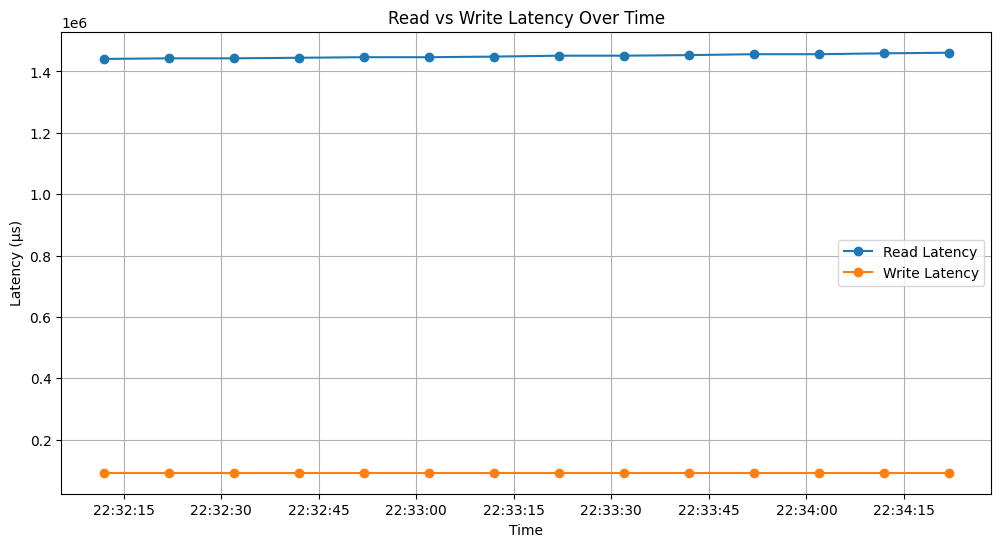

In [3]:
plt.figure(figsize=(12, 6))

# Wykres latencji odczytu
plt.plot(read_latency['timestamp'], read_latency['value'], label='Read Latency', marker='o')

# Wykres latencji zapisu
plt.plot(write_latency['timestamp'], write_latency['value'], label='Write Latency', marker='o')

plt.title('Read vs Write Latency Over Time')
plt.xlabel('Time')
plt.ylabel('Latency (μs)')
plt.legend()
plt.grid()
plt.show()


<Figure size 800x600 with 0 Axes>

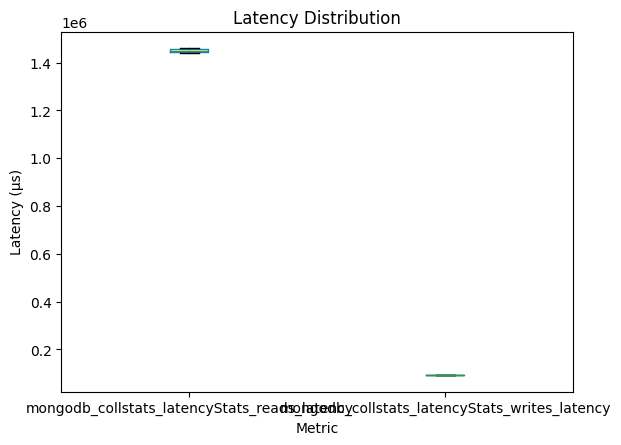

In [4]:
# Tworzenie wykresu pudełkowego
plt.figure(figsize=(8, 6))
data.boxplot(column='value', by='metric', grid=False)
plt.title('Latency Distribution')
plt.suptitle('')  # Usuń podtytuł
plt.xlabel('Metric')
plt.ylabel('Latency (μs)')
plt.show()


In [5]:
from scipy.stats import ttest_ind

# Test t-Studenta
t_stat, p_value = ttest_ind(read_latency['value'], write_latency['value'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Istnieją istotne różnice między odczytem a zapisem.")
else:
    print("Nie znaleziono istotnych różnic między odczytem a zapisem.")


T-statistic: 786.0283336240246, P-value: 2.010526040959604e-58
Istnieją istotne różnice między odczytem a zapisem.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
from scipy.stats import f_oneway

# Przykład: dane grupowane według kolekcji
grouped = data.groupby('metric')['value']
anova_result = f_oneway(*[group for _, group in grouped])
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Istnieją istotne różnice między grupami.")
else:
    print("Nie znaleziono istotnych różnic między grupami.")


F-statistic: 617840.5412594436, P-value: 2.0105260409729953e-58
Istnieją istotne różnice między grupami.


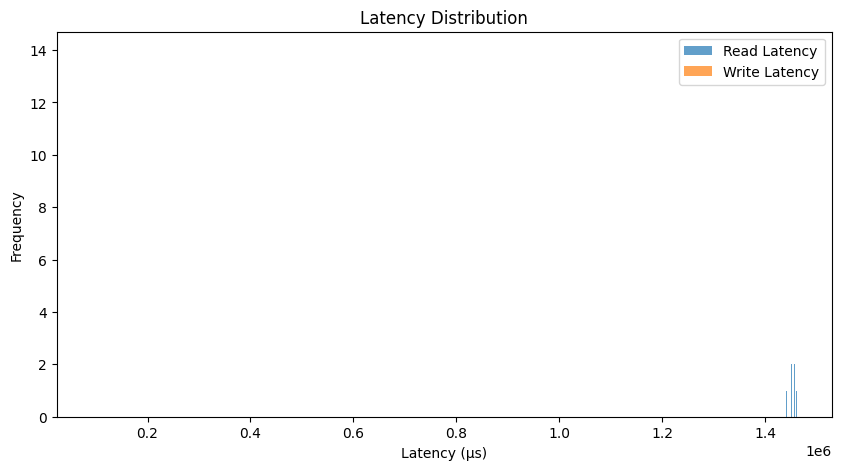

In [8]:
plt.figure(figsize=(10, 5))

# Histogram odczytów
plt.hist(read_latency['value'], bins=20, alpha=0.7, label='Read Latency')

# Histogram zapisów
plt.hist(write_latency['value'], bins=20, alpha=0.7, label='Write Latency')

plt.title('Latency Distribution')
plt.xlabel('Latency (μs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
